In [143]:
import numpy as np
import matplotlib.pyplot as plt

In [144]:
data = np.loadtxt('data/qsar_aquatic_toxicity.csv', delimiter=';')
X, y = data[:,:-1], data[:,-1]

Cassotti got to cut outliers so i do too

In [145]:
from sklearn.neighbors import KDTree

In [146]:
from sklearn.neighbors import DistanceMetric

In [147]:
kd = KDTree(X)

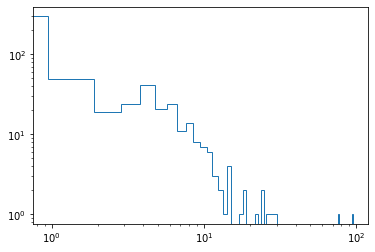

In [148]:
plt.hist([kd.query(X[i:i+1],k=2)[0][0,1] for i in range(len(X))], bins=100, histtype='step');
plt.yscale('log')
plt.xscale('log')

In [149]:
X.shape

(546, 8)

In [150]:
X.shape

(546, 8)

In [151]:
not_too_far = np.array([True if not x[0][0,1]>10 else False for x in [kd.query(X[i:i+1],2) for i in range(len(X))]])

In [152]:
np.array(sum(not_too_far) / X.shape[0]).round(3)

0.94

In [153]:
X, y = X[not_too_far], y[not_too_far]

In [188]:
state = np.random.get_state()
np.random.shuffle(X)
np.random.set_state(state)
np.random.shuffle(y)

In [154]:
with open('GPs.pkl', 'rb') as file:
    from pickle import load
    GPs = load(file)

/home/elliott/anaconda3/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator GaussianProcessRegressor from version 0.23.2 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [185]:

mine = GPs[-1]

In [187]:
mine.log_marginal_likelihood_value_

-1527.0215110095944

In [186]:
mine.score(X,y)

0.9985878678990544

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor

In [194]:
markers = [0,int(len(y)*1/3),int(len(y)*2/3),-1]

In [212]:
tmp = np.arange(20)

In [215]:
tmp[::3], tmp[1::3]

(array([ 0,  3,  6,  9, 12, 15, 18]), array([ 1,  4,  7, 10, 13, 16, 19]))

In [238]:
def f(x, y):
    print(x.shape)

In [239]:
f(*train)

(342,)


In [272]:
mine = GPs[2]

In [280]:
del GPs[1]

In [329]:
for j in range(2):
    print('j',j)
    mine = GPs[j]
    print('\tLog Likelihood', mine.log_marginal_likelihood_value_.round(3))
    print('\tR^2',GaussianProcessRegressor(kernel=mine.kernel_, optimizer=None).fit(X,y).score(X,y).round(4))

    CV = []
    F3 = []
    for i in range(3):
        test = X[i::3], y[i::3]
        train = np.append(X[(i+1)%3::3], X[(i+2)%3::3], 0), np.append(y[(i+1)%3::3], y[(i+2)%3::3])
        tmp = GaussianProcessRegressor(kernel=mine.kernel_, optimizer=None).fit(*train).score(*train)
        CV.append(tmp)

        gp = GaussianProcessRegressor(kernel=mine.kernel_, optimizer=None).fit(*train)
        press = np.sum(np.power(test[1]-gp.predict(test[0]),2))
        ss_tr = np.sum(np.power(test[1]-np.mean(train[1]),2))
        ss_ext = np.sum(np.power(test[1]-np.mean(test[1]),2))
        tss = np.sum(np.power(train[1]-np.mean(train[1]),2))
        #f1 = 1. - press/ss_tr
        #f2 = 1. - press/ss_ext
        f3 = 1. - press * train[0].shape[1] / (tss*test[0].shape[1])
        #for f in ['f1','f2','f3']:
            #print(f,':', eval(f).round(2))
        F3.append(f3)

    print('\tCV',np.mean(CV).round(4))
    print('\tF3',np.mean(F3).round(4))
    print()

j 0
	Log Likelihood -764.687
	R^2 0.8504
	CV 0.8626
	F3 0.8049

j 1
	Log Likelihood -770.483
	R^2 0.8176
	CV 0.8293
	F3 0.8017



In [318]:
likelihoods = -np.array([764.687, 770.483, 780.198])

In [319]:
tmp = likelihoods[0]

In [326]:
np.exp(likelihoods[1] - tmp)

0.003039689217121714

In [ ]:
np.exp()

In [311]:
-2 * (764.687 - 770.483)

11.59199999999987

In [313]:
-2 * (764.687 - 780.198)

31.021999999999935